In [74]:
PROJECT_ROOT_PATH = "../../"

datapath = PROJECT_ROOT_PATH + "lab_competition/data/"
outpath = PROJECT_ROOT_PATH + "lab_competition/output/01/"

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import collections
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.options.display.max_columns = 32

In [75]:
dev_label = np.loadtxt(datapath + "label.dev.txt")

In [76]:
dev_result_df = pd.read_csv(datapath+"step_estimator_dev_tmp.csv")
dev_result_df.head()

,data,text,negative_pred,3class_pred,positive_pred
0,0.0,建設中の建物の利用目的も変更になるだろうなあ。,-1,1,1
1,-2.0,演劇とかも同時並行でやっている。演劇の危機にどう思ってるか知りたかった。,-1,0,1
2,-1.0,犬夜叉には腐女子っていないのかな？というかあの漫画はＮＬ向けの漫画なのかも。,-1,1,2
3,0.0,話を続けるための子どもって感じかな。でも、それって簡単にやってはいけない気もする。,-1,0,1
4,-1.0,今、製作中の劇場版が子どもとかだったらどうしよう。,-1,-1,1


In [77]:
test_result_df = pd.read_csv(datapath+"step_estimator_tmp.csv")
test_result_df.head()

,text,negative_pred,3class_pred,positive_pred
0,ハッピーセット、またプラレールが始まるからしばらくマックばかりになりそう。,-1,1,1
1,今日は天気が良いので外出がきもちよいです。秋晴れ良いですね。,-2,1,1
2,あぁ〜そうなんだ。。。 やっぱライブでは芸人みんなわちゃわちゃしてるとこが見たかったな,-1,1,2
3,踊り場110話まできたぞこら,-1,1,1
4,カウコン行かれる方、楽しんで下さい〜！！,-1,1,1


In [78]:
def cal_result(result_df):
    result = []
    for index, row in result_df.iterrows():
        if row["3class_pred"] == 0:
            result.append(0)
        elif row["3class_pred"] == 1:
            result.append(row["positive_pred"])
        elif row["3class_pred"] == -1:
            result.append(row["negative_pred"])
    return result

In [79]:
test_result = cal_result(test_result_df)
dev_result = cal_result(dev_result_df)

正確率 = 0.358 kappa = 0.379
              precision    recall  f1-score   support

        -2.0       0.28      0.20      0.23       310
        -1.0       0.32      0.31      0.31       415
         0.0       0.36      0.31      0.33       647
         1.0       0.42      0.50      0.46       837
         2.0       0.27      0.29      0.28       291

    accuracy                           0.36      2500
   macro avg       0.33      0.32      0.32      2500
weighted avg       0.35      0.36      0.35      2500



<AxesSubplot: >

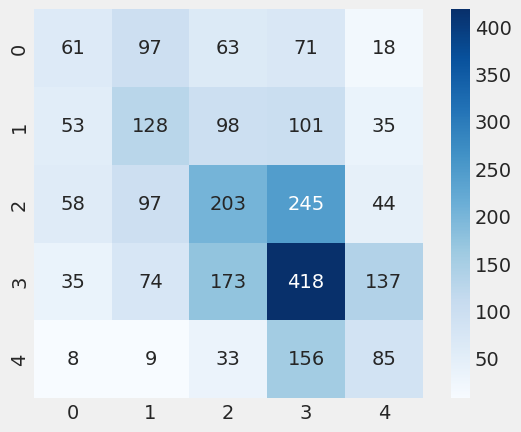

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

acc = accuracy_score(dev_result, dev_label)
k = cohen_kappa_score(dev_result, dev_label, weights="quadratic")
print("正確率 = %.3f kappa = %.3f" % (acc, k))
print(classification_report(dev_label, dev_result))
sns.heatmap(confusion_matrix(dev_label, dev_result), square=True, cbar=True, annot=True, cmap='Blues', fmt='d')

In [81]:
np.savetxt(outpath + "v0.0.1_StepEstimator.txt", test_result, fmt="%.0f")